<a href="https://colab.research.google.com/github/hamsungmin/DataTrainAnalysis/blob/main/project_week11_%EC%9D%B4%EB%AF%B8%EC%A7%80_%EC%B6%94%EB%A1%A0%EC%83%98%ED%94%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. 데이터 확인 및 준비 과정**

<aside>

**진행 프로세스**

- 학습을 시작하기 전에는 반드시 **각 클래스별 데이터 개수**를 점검해야 합니다. 이 과정을 통해 **데이터 불균형 여부**를 미리 파악할 수 있으며, 이는 이후 모델 성능을 **공정하고 신뢰성 있게 비교·분석**하는 데 필수적입니다.
    
    또한 원본 데이터를 올바르게 이해해야만 이후 단계에서 **리사이즈, 정규화, 전처리 방식**을 정확하게 결정할 수 3있기 때문에, 데이터셋 확인은 학습 준비 단계에서 **매우 중요한 과정**입니다.
    
    - fashion.zip 파일을 압축해제하고  각 class별 파일의갯수 확인
    - 이미지의 기본특성인 shape, 픽셀의 최소,최대값을 확인하고 샘플이미지를 출력
- 원본 이미지만 사용하면 모델이 학습 데이터에 과도하게 맞춰져 **과적합(Overfitting)** 이 발생할 수 있습니다. 이를 방지하기 위해 **좌우 반전, 회전, 대비 조절 등 다양한 증강 기법**을 적용하여, 모델이 새로운 데이터에도 잘 **일반화(Generalization)** 할 수 있도록 합니다.
    - PyTorch의 `transforms`에서 제공하는 **데이터 증강 기법 중 2가지 이상**을 적용하고, 변환된 이미지를 시각화하여 결과를 확인
</aside>

In [ ]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# 1. fashion 경로
dataset_path = '/content/drive/MyDrive/fashion/'

# 2. 클래스별 이미지 개수 확인
class_counts = {}
for class_name in os.listdir(dataset_path):
    class_dir = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_dir):
        count = len([f for f in os.listdir(class_dir) if f.endswith(('.jpg', '.png'))])
        class_counts[class_name] = count

print("클래스별 이미지 개수:")
for cls, cnt in class_counts.items():
    print(f"{cls}: {cnt}장")

클래스별 이미지 개수:
black_shirt: 715장
black_dress: 450장
black_shoes: 772장
black_shorts: 429장
black_pants: 871장
blue_dress: 502장
blue_pants: 798장
blue_shirt: 741장
blue_shorts: 557장
blue_shoes: 773장
brown_pants: 311장
brown_shoes: 464장
brown_shorts: 40장
green_pants: 227장
green_shirt: 230장
green_shoes: 455장
red_dress: 800장
green_shorts: 135장
red_pants: 308장
red_shoes: 610장
white_dress: 818장
white_pants: 274장
white_shoes: 600장
white_shorts: 120장


In [ ]:
!sudo apt-get update -qq
!sudo apt-get install -y fonts-nanum-coding
# Set Korean font for matplotlib
import matplotlib as mpl
mpl.rc('font', family='NanumBarunGothic')
mpl.rcParams['axes.unicode_minus'] = False

print("폰트 설치 및 설정 완료.")

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum-coding is already the newest version (2.5-3).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
폰트 설치 및 설정 완료.


이미지 shape: (501, 312, 3)
픽셀 최소값: 0
픽셀 최대값: 255


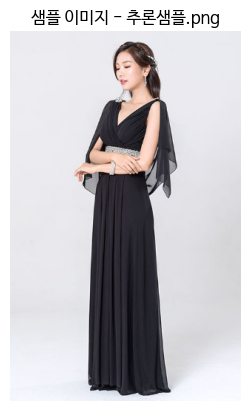

In [ ]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Find the font file path
font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
if not os.path.exists(font_path):
    font_path = '/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf' # Fallback to NanumGothicCoding

# Add the font to the font manager and set it
fm.fontManager.addfont(font_path)
plt.rcParams['font.family'] = 'NanumBarunGothic' # Try setting to NanumBarunGothic first
if 'NanumBarunGothic' not in plt.rcParams['font.family']:
     plt.rcParams['font.family'] = 'NanumGothicCoding' # Fallback to NanumGothicCoding
plt.rcParams['axes.unicode_minus'] = False


# 추론샘플.png 파일을 샘플 이미지로 정한다 (파일 경로 수정)
sample_image_path = '/content/drive/MyDrive/fashion/추론샘플.png'

img = Image.open(sample_image_path)
img_array = np.array(img)

print("이미지 shape:", img_array.shape)
print("픽셀 최소값:", img_array.min())
print("픽셀 최대값:", img_array.max())

plt.imshow(img)
plt.title("샘플 이미지 - 추론샘플.png")
plt.axis('off')
plt.show()

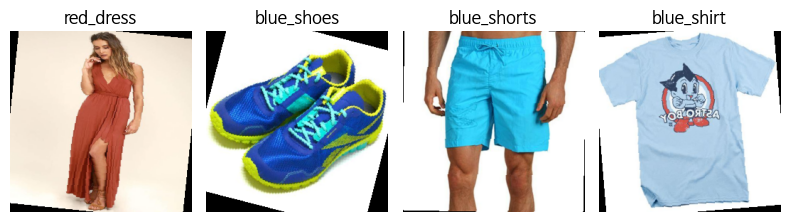

In [ ]:
#좌우반전(RandomHorizontalFlip), 회전(RandomRotation) 2가지를 적용

import torch
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import matplotlib as mpl

# 변환 정의
transform = transforms.Compose([
    transforms.Resize((256, 256)),  # 이미지 크기를 256x256으로 통일
    transforms.RandomHorizontalFlip(p=0.5),  # 좌우 반전
    transforms.RandomRotation(15),           # ±15도 회전
    transforms.ToTensor()
])

# 데이터셋 로드
train_dataset = ImageFolder(root=dataset_path, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)

# 증강 결과 확인
data_iter = iter(train_loader)
images, labels = next(data_iter)

plt.figure(figsize=(8, 4))
for i in range(len(images)):
    plt.subplot(1, 4, i+1)
    plt.imshow(images[i].permute(1, 2, 0))
    plt.title(train_dataset.classes[labels[i]])
    plt.axis('off')
plt.tight_layout()
plt.show()

**2. 사전학습 모델 결정 및 모델 featureMap 시각화를 통한 훈련레이어 결정**

<aside>

**진행 프로세스**

- 딥러닝 모델을 이해하기 위해서는 단순히 학습 결과만 보는 것이 아니라, **모델의 구조(Architecture)** 자체를 파악하는 것이 필요합니다. ResNet50은 매우 깊은 네트워크이기 때문에 전체 레이어를 한눈에 보기 어렵습니다. 따라서 모델 구조를 출력하고, 특히 **상위 레이어(출력단에 가까운 부분)** 를 확인하여, **어떤 연산이 최종 분류를 담당하는지**, **파인튜닝 시 수정해야 할 부분이 어디인지** 파악합니다.
    - `ResNet50` 모델 전체 구조를 출력하여 레이어의 이름과 형태를 확인
    - 최상위 레이어만 출력하여 이름 확인
- CNN은 레이어가 깊어질수록 **단순한 저수준 특징(엣지, 윤곽선)** 에서 시작해, 점점 **복잡한 고수준 특징(형태, 질감, 패턴)** 을 학습합니다.  중간 계층의 출력을 시각화하여 모델이 이미지를 어떻게 이해하는지 확인하고, 파인튜닝 시 어느 레이어를 고정하거나 학습시킬지 결정합니다.
    - ResNet50 사전학습 모델에 데이터셋의 이미지 한 장을 최상위 레이어에 통과하여 시각화
    - 각 레이어의 **feature map**  추출 결과를 확인하고 재훈련 레이어를 결정
</aside>

In [ ]:
import torchvision.models as models

# 사전학습(Pretrained) 모델 로드
resnet50 = models.resnet50(pretrained=True)

# 전체 구조 출력
print(resnet50)

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
print("모델의 최상위만 출력")
layers_to_hook = []
# 모델의 최상위 레이어들을 순회하며 이름과 함께 출력
for name, layer in resnet50.named_children():
    print(f"{name}")
    layers_to_hook.append(name)

모델의 최상위만 출력
conv1
bn1
relu
maxpool
layer1
layer2
layer3
layer4
avgpool
fc


In [ ]:
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt

# 이미지 전처리
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

img_path = '/content/drive/MyDrive/fashion/추론샘플.png'  # 데이터셋 이미지 한 장
input_image = Image.open(img_path).convert('RGB')
input_tensor = preprocess(input_image).unsqueeze(0)  # (1, 3, 224, 224)

# GPU 사용 가능 시 이동
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
resnet50 = resnet50.to(device)
input_tensor = input_tensor.to(device)

conv1 shape: torch.Size([64, 112, 112])


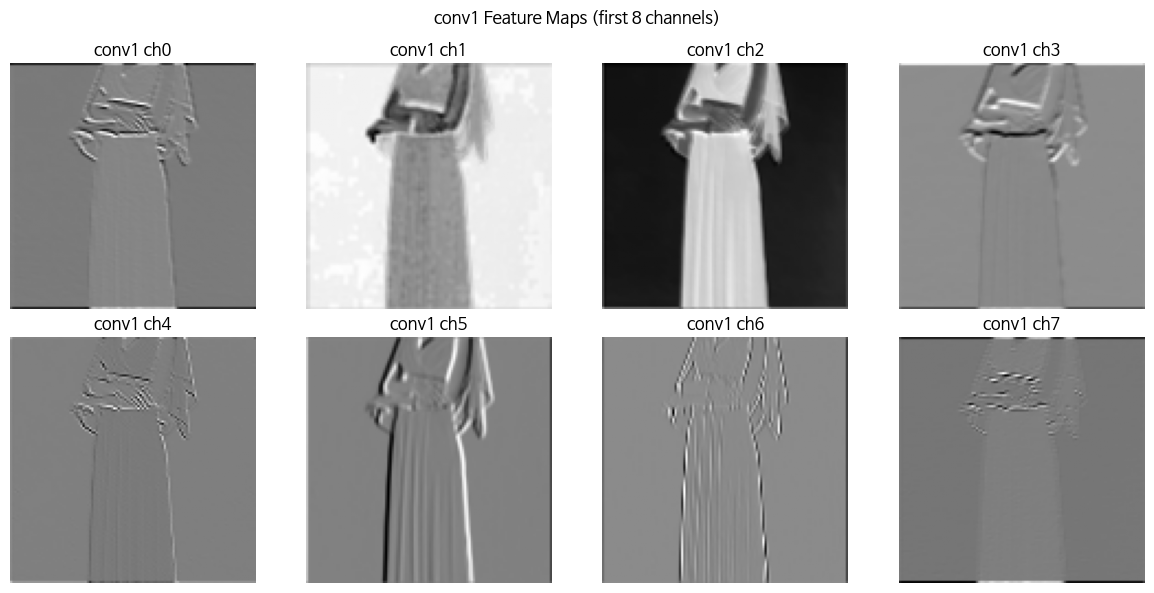

bn1 shape: torch.Size([64, 112, 112])


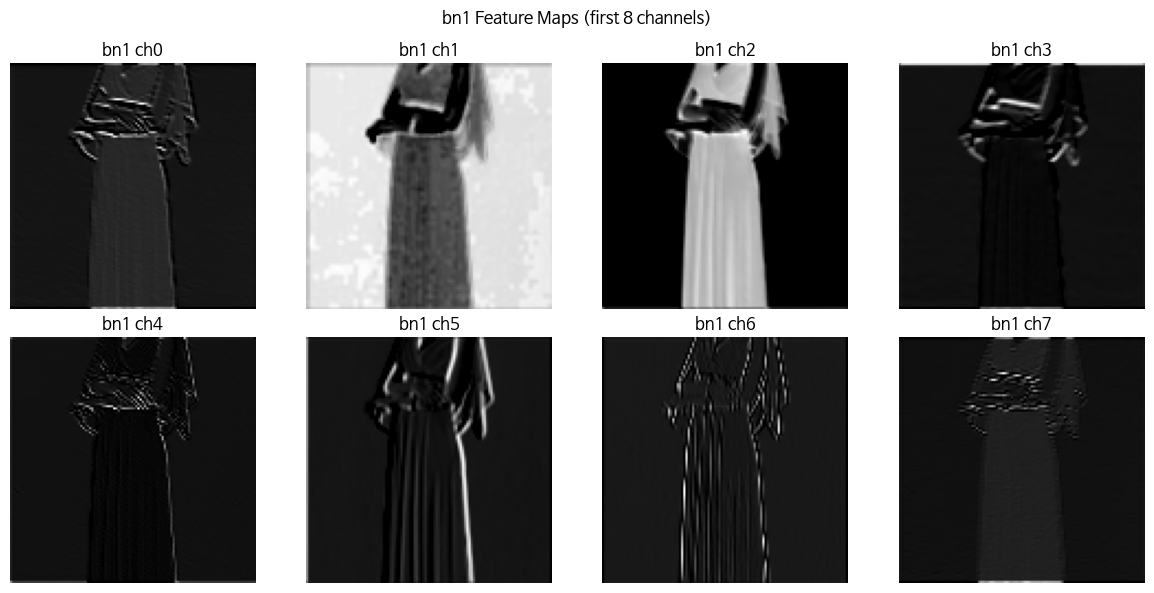

relu shape: torch.Size([64, 112, 112])


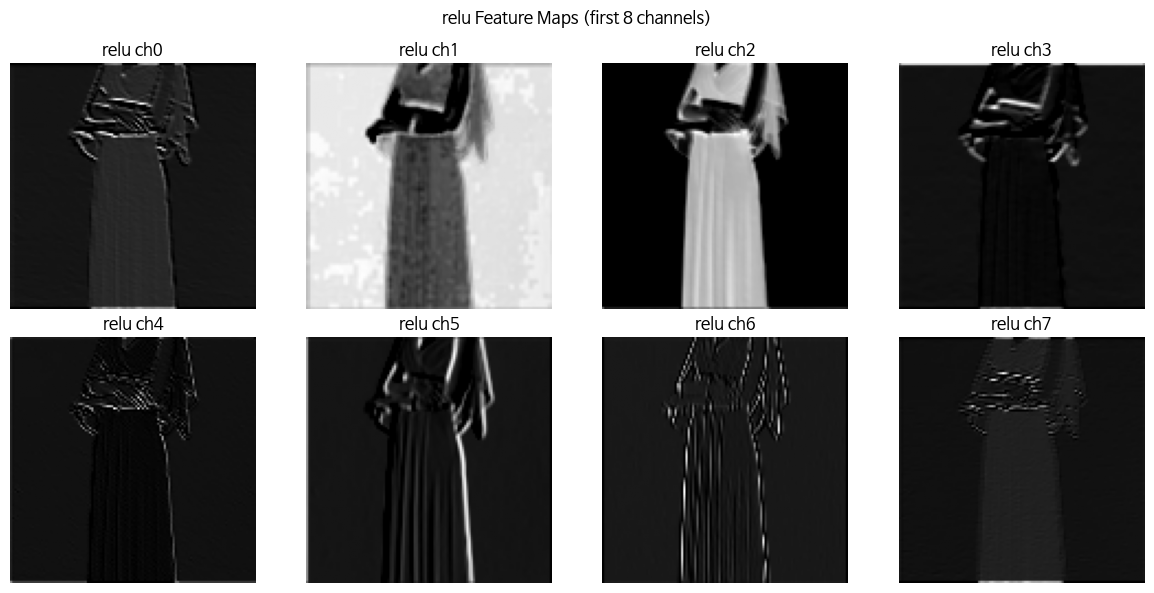

maxpool shape: torch.Size([64, 56, 56])


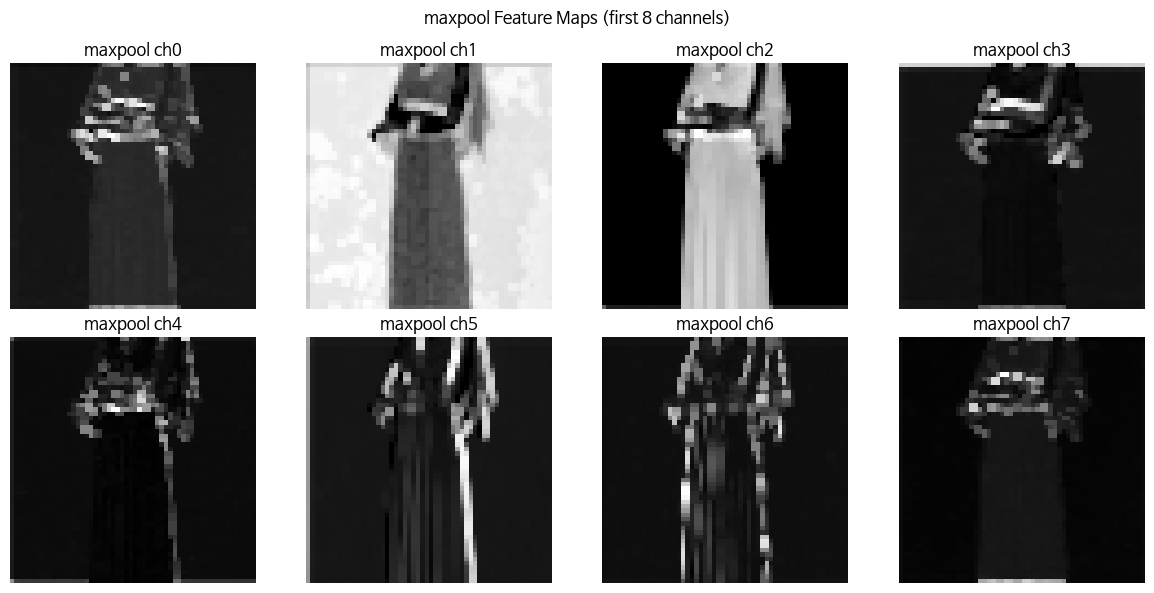

layer1 shape: torch.Size([256, 56, 56])


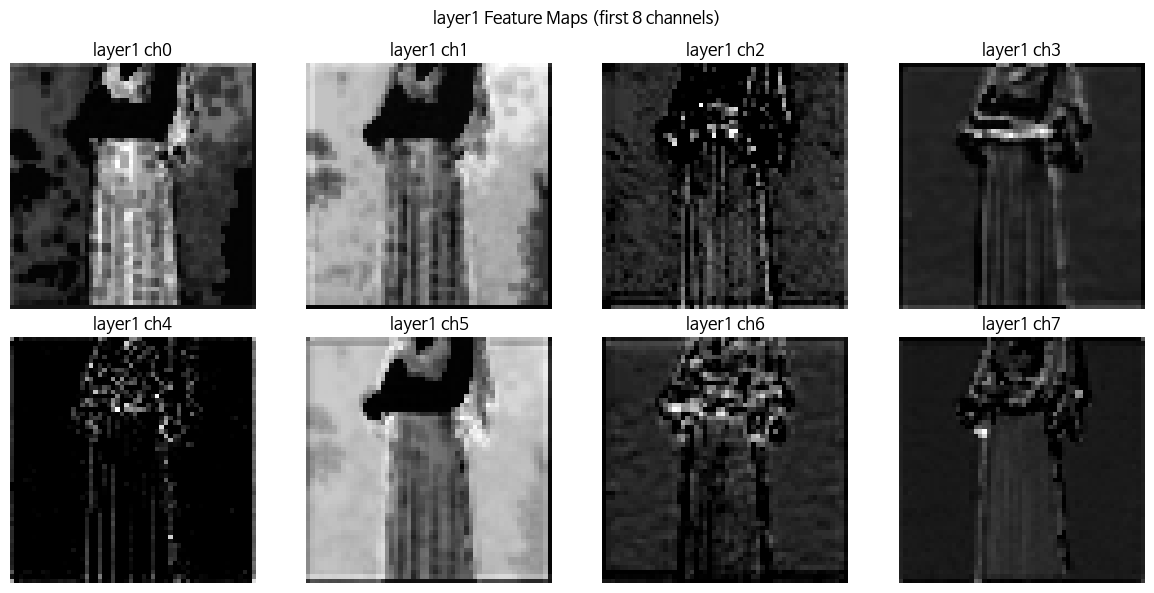

layer2 shape: torch.Size([512, 28, 28])


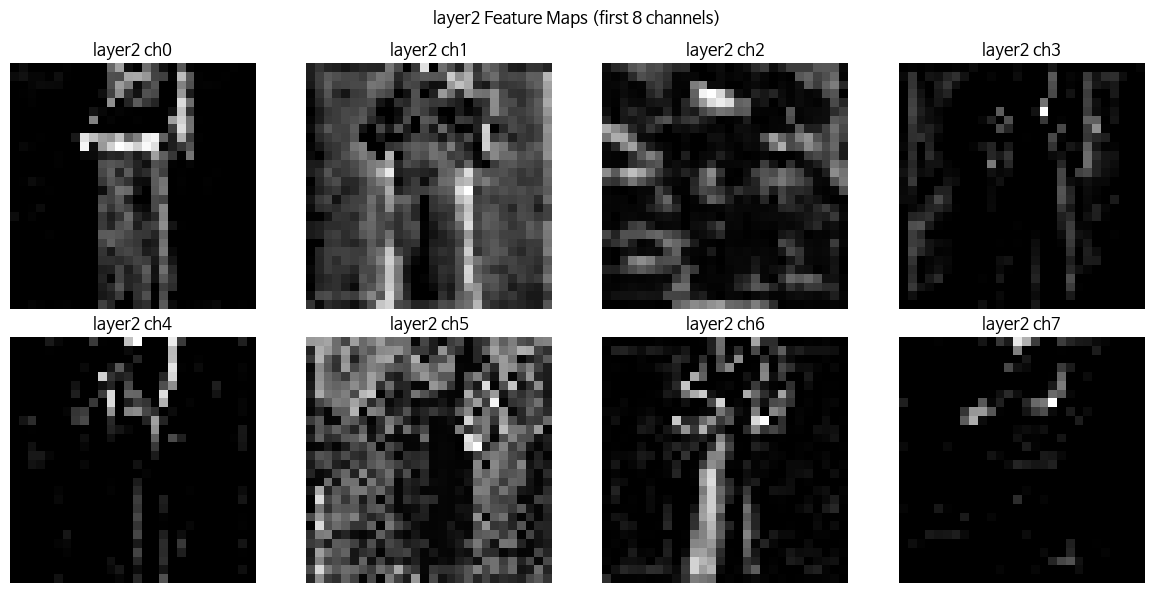

layer3 shape: torch.Size([1024, 14, 14])


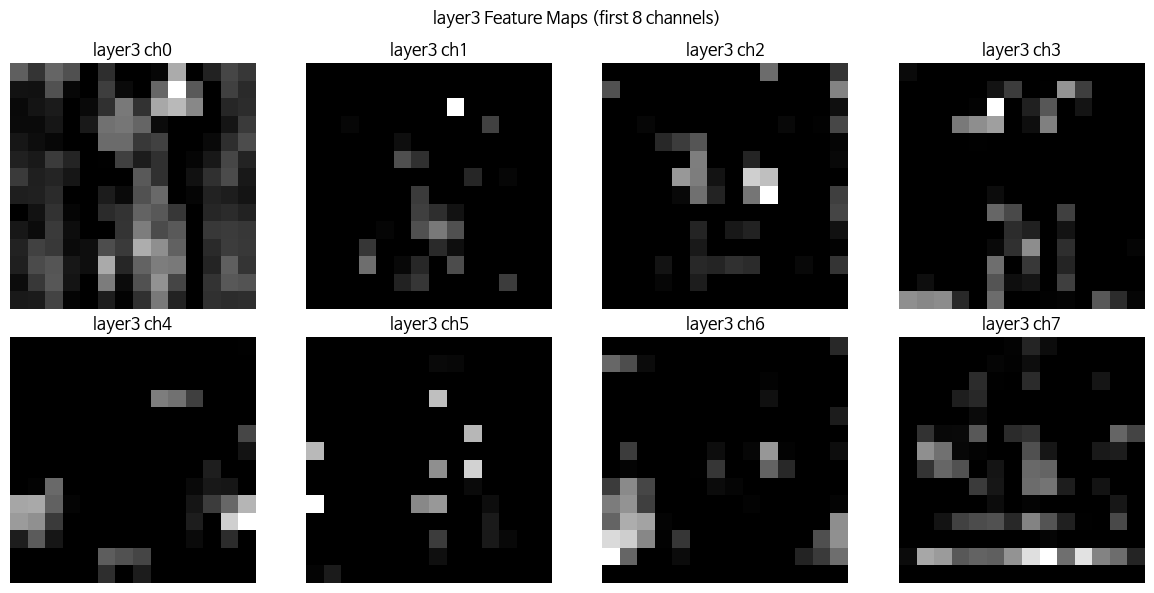

layer4 shape: torch.Size([2048, 7, 7])


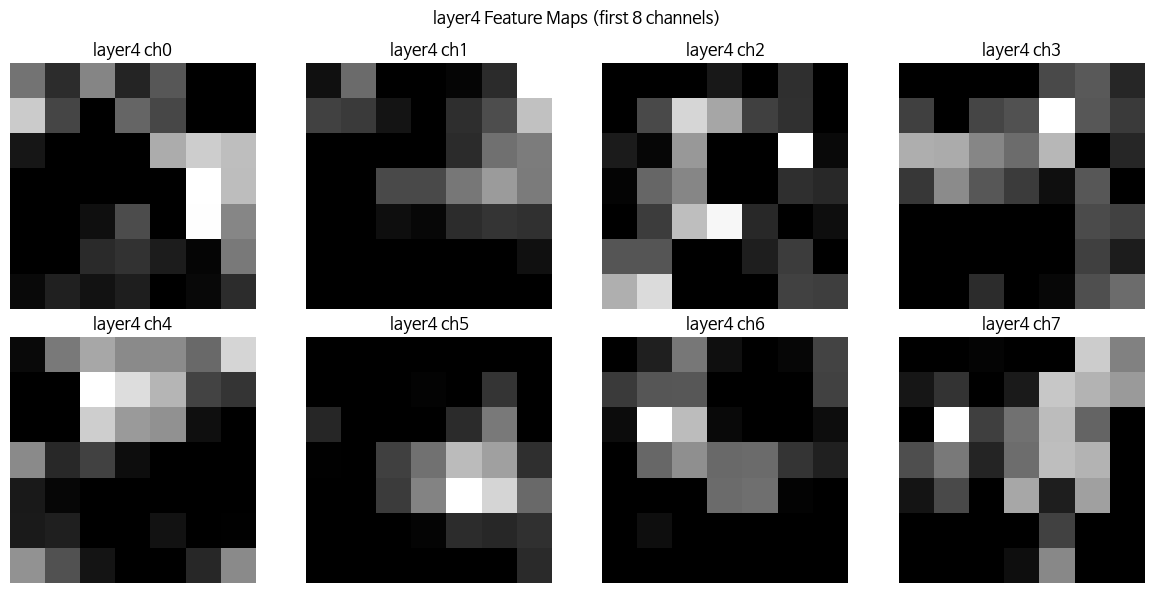

avgpool shape: torch.Size([2048, 1, 1])


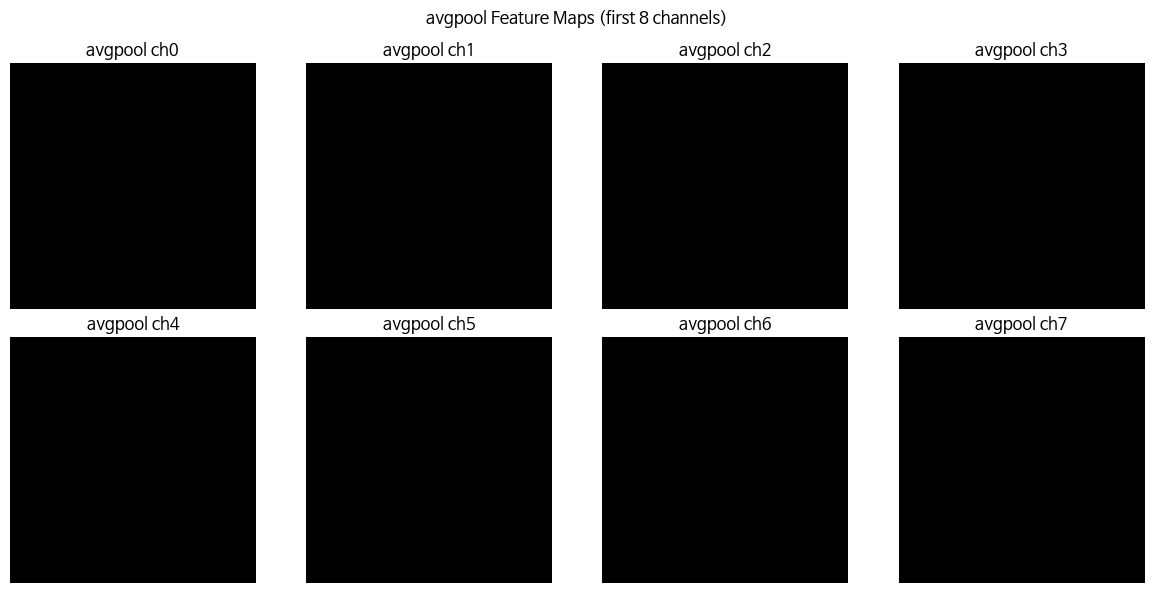

fc shape: torch.Size([1000])


In [ ]:
feature_maps = {}
def get_feature(name):
    def hook(model, input, output):
        feature_maps[name] = output.detach()
    return hook

# 4. hook 등록
for name in layers_to_hook:
    layer = getattr(resnet50, name)
    layer.register_forward_hook(get_feature(name))

# 5. forward
with torch.no_grad():
    _ = resnet50(input_tensor)

# 6. 시각화
for name in layers_to_hook:
    fmap = feature_maps[name].cpu().squeeze(0)
    if fmap.dim() == 3:  # (C,H,W)
        print(f"{name} shape:", fmap.shape)
        plt.figure(figsize=(12, 6))
        for i in range(8):  # 앞 8채널만
            plt.subplot(2, 4, i+1)
            plt.imshow(fmap[i].numpy(), cmap='gray')
            plt.title(f'{name} ch{i}')
            plt.axis('off')
        plt.suptitle(f'{name} Feature Maps (first 8 channels)')
        plt.tight_layout()
        plt.show()
    else:
        print(f"{name} shape:", fmap.shape)  # avgpool 등 2D아닌 경우

 **3.CNN 학습 데이터 셋 준비 (훈련, 검증, 테스트 데이터)**

<aside>

**진행 프로세스**

- 이미지 데이터셋을 학습에 활용하기 위해서는 **적절한 변환(Transform) 정의**와 **훈련/검증/테스트 분할** 과정이 필요합니다.  훈련 시 다양한 변형을 경험하고, 검증 및 테스트 단계에서는 공정하게 성능을 평가할 수 있도록 훈련/검증/테스트 데이터를 전처리와 증강 변환을 각 데이터셋에 맞추어서 적용합니다.
    - 전체 데이터를 불러온 뒤, 훈련 80% / 검증 10% / 테스트 10%로 분할3
    - 각 데이터셋을 256 batch 단위로 불러올 수 있도록 준비하고, 개수와 클래스 이름 출력
    - 훈련용 이미지는 여러 가지 변형을 적용하여 다양한 패턴을 학습할 수 있도록 준비
    - 평가용 이미지는 항상 같은 조건에서 비교할 수 있도록 일정한 형태로만 준비
</aside>

In [ ]:
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms
# 1️ 훈련·검증·테스트용 transform 정의
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),       # 좌우 반전
    transforms.RandomRotation(15),           # 회전
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

eval_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# 2️ 전체 데이터셋 로드 (train_transform만 우선 적용)
data_dir = '/content/drive/MyDrive/fashion/'  # 본인 데이터 경로
full_dataset = datasets.ImageFolder(root=data_dir, transform=train_transform)

# 전체 데이터 개수와 클래스 이름 확인
total_count = len(full_dataset)
class_names = full_dataset.classes
num_classes = len(class_names)

print("전체 개수:", total_count)
print("클래스갯수:", num_classes)
print("클래스:", class_names)

# 3️ 80/10/10 분할
train_size = int(0.8 * total_count)
val_size = int(0.1 * total_count)
test_size = total_count - train_size - val_size

train_dataset, val_dataset, test_dataset = random_split(
    full_dataset, [train_size, val_size, test_size])

# 평가용 데이터셋은 eval_transform 적용
val_dataset.dataset.transform = eval_transform
test_dataset.dataset.transform = eval_transform

# 4️ DataLoader 준비 (batch size 256)
batch_size = 512
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# 5️ 데이터 개수 출력
print(f"배치 크기: {batch_size}")
print(f"train 개수: {len(train_dataset)}")
print(f"val 개수: {len(val_dataset)}")
print(f"test 개수: {len(test_dataset)}")
print(f"전체 개수: {total_count}")

전체 개수: 12000
클래스갯수: 24
클래스: ['black_dress', 'black_pants', 'black_shirt', 'black_shoes', 'black_shorts', 'blue_dress', 'blue_pants', 'blue_shirt', 'blue_shoes', 'blue_shorts', 'brown_pants', 'brown_shoes', 'brown_shorts', 'green_pants', 'green_shirt', 'green_shoes', 'green_shorts', 'red_dress', 'red_pants', 'red_shoes', 'white_dress', 'white_pants', 'white_shoes', 'white_shorts']
배치 크기: 512
train 개수: 9600
val 개수: 1200
test 개수: 1200
전체 개수: 12000


 **4. 사전학습을 이용한 이미지 분류 모델링 및 시각화**

<aside>

**진행 프로세스**

- 전이학습을 위해 사전학습된 모델을 불러오고, 재훈련할 레이어를 선택하여 설정합니다.
    - 사전학습된 ResNet50 모델을 불러오고, 학습할 레이어(layer3, layer4, fc)만 활성화
    - 최종 분류기(fc)를 현재 클래스수에 맞게 수정
- 학습과 평가를 진행하면서, 모델의 안정적인 수렴과 과적합 방지를 위해 **검증 손실(val_loss)이 일정 기준 이하로 감소**했을 때 학습을 조기 종료하도록 설정합니다.
    - 주어진 횟수(epoch) 동안 모델을 학습시키고, 훈련 손실과 정확도를 기록
    - 검증 데이터를 활용해 손실과 정확도를 평가하고, val_loss가 =<0.1  에 도달하면 조기 종료
</aside>

[Epoch 1] Train Loss: 2.4919 | Train Acc: 44.85% | Val Loss: 1.3182 | Val Acc: 68.67%
[Epoch 2] Train Loss: 0.8111 | Train Acc: 85.40% | Val Loss: 0.3305 | Val Acc: 91.08%
[Epoch 3] Train Loss: 0.1828 | Train Acc: 95.71% | Val Loss: 0.1540 | Val Acc: 96.33%
Early stopping at Epoch 3 (Val Loss 0.1540)


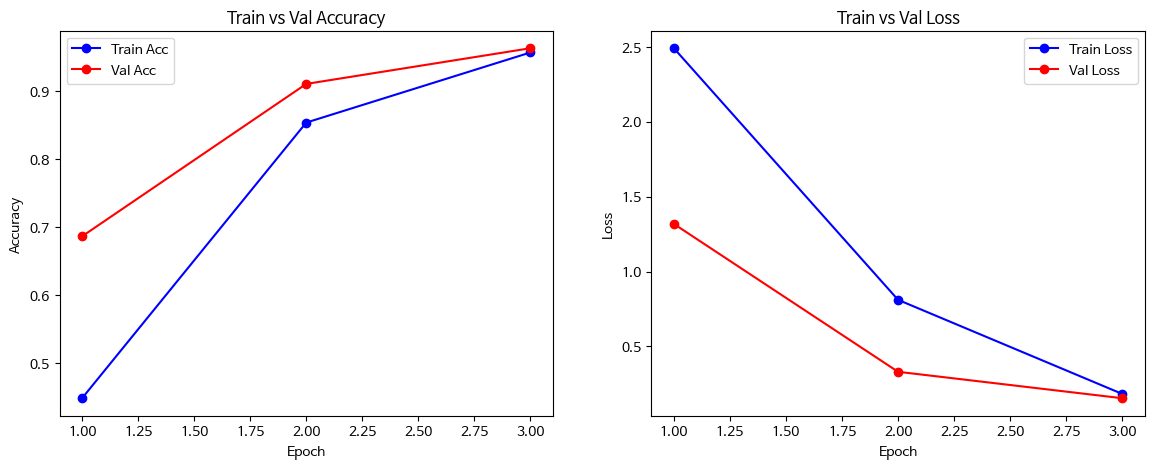

Test Accuracy: 95.83%


In [ ]:
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader, random_split
import numpy as np

# -------------------------
# 2. 모델 준비 (ResNet50)
# -------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = models.resnet50(weights=models.ResNet50_Weights.DEFAULT)

# 마지막 FC 레이어 교체
model.fc = nn.Linear(model.fc.in_features, num_classes)

# layer3, layer4, fc만 학습하도록 설정
for name, param in model.named_parameters():
    param.requires_grad = False  # 일단 전부 동결
for name, param in model.named_parameters():
    if name.startswith('layer3') or name.startswith('layer4') or name.startswith('fc'):
        param.requires_grad = True

model = model.to(device)

# -------------------------
# 3. Loss, Optimizer
# -------------------------
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=1e-4)

# -------------------------
# 4. 학습 루프 + Early Stopping
# -------------------------
num_epochs = 5
patience_loss = 0.2  # val_loss <= 0.1 이면 조기종료
train_loss_list, val_loss_list = [], []
train_acc_list, val_acc_list = [], []

for epoch in range(num_epochs):
    # train
    model.train()
    running_loss = 0.0
    running_corrects = 0
    total = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        _, preds = torch.max(outputs, 1)
        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)
        total += labels.size(0)

    epoch_loss = running_loss / total
    epoch_acc = running_corrects.double() / total

    # val
    model.eval()
    val_loss = 0.0
    val_corrects = 0
    total_val = 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            _, preds = torch.max(outputs, 1)
            val_loss += loss.item() * inputs.size(0)
            val_corrects += torch.sum(preds == labels.data)
            total_val += labels.size(0)

    val_loss /= total_val
    val_acc = val_corrects.double() / total_val

    train_loss_list.append(epoch_loss)
    val_loss_list.append(val_loss)
    train_acc_list.append(epoch_acc.item())
    val_acc_list.append(val_acc.item())

    print(f"[Epoch {epoch+1}] Train Loss: {epoch_loss:.4f} | Train Acc: {epoch_acc*100:.2f}% "
          f"| Val Loss: {val_loss:.4f} | Val Acc: {val_acc*100:.2f}%")

    # early stopping
    if val_loss <= patience_loss:
        print(f"Early stopping at Epoch {epoch+1} (Val Loss {val_loss:.4f})")
        break

# -------------------------
# 5. 학습/검증 그래프 시각화
# -------------------------
epochs = np.arange(1, len(train_loss_list) + 1)

plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(epochs, train_acc_list, 'bo-', label='Train Acc')
plt.plot(epochs, val_acc_list, 'ro-', label='Val Acc')
plt.title('Train vs Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs, train_loss_list, 'bo-', label='Train Loss')
plt.plot(epochs, val_loss_list, 'ro-', label='Val Loss')
plt.title('Train vs Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# -------------------------
# 6. 최종 Test 평가
# -------------------------
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Test Accuracy: {100 * correct / total:.2f}%")

**5. 사전학습을 이용한 이미지 분류 모델링 및 시각화**

<aside>

**진행 프로세스**

모델의 성능은 학습에 사용되지 않은 **테스트 데이터셋** 으로 평가합니다. 이 과정에서 **손실 값과 정확도**

를 확인하고, 각 클래스별 Precision·Recall·F1-score를 분석합니다. 또한 **혼동행렬(Confusion Matrix)** 을 통해 어떤 클래스에서 혼동이 발생했는지 직관적으로 파악합니다.

**결과물**

- 학습이 완료된 모델을 **테스트 데이터셋**에 대해 평가합니다.
- 평가 과정에서 **손실 값(Test Loss)** 과 **정확도(Test Accuracy)** 를 계산하여 모델의 최종 성능을 수치로 확인합니다.
- `classification_report` 를 통해 각 클래스별 **Precision, Recall, F1-score** 를 산출하고, 모델이 어떤 클래스에서 강점·약점을 보이는지 파악합니다.
- Confusion Matrix를 시각화하여, **예측이 많이 틀린 클래스 쌍**을 직관적으로 확인합니다.

</aside>

Test Loss: 0.1364
Test Accuracy: 95.83%
Classification Report
              precision    recall  f1-score   support

 black_dress       0.96      0.94      0.95        48
 black_pants       0.99      0.97      0.98        98
 black_shirt       0.93      0.92      0.93        62
 black_shoes       0.95      0.99      0.97        77
black_shorts       0.98      0.94      0.96        47
  blue_dress       0.92      0.96      0.94        50
  blue_pants       0.95      0.96      0.96        79
  blue_shirt       0.96      0.96      0.96        68
  blue_shoes       0.97      0.99      0.98        79
 blue_shorts       0.91      0.94      0.92        51
 brown_pants       0.92      0.92      0.92        38
 brown_shoes       1.00      0.95      0.98        43
brown_shorts       0.00      0.00      0.00         4
 green_pants       0.76      0.86      0.81        22
 green_shirt       0.95      0.95      0.95        19
 green_shoes       1.00      1.00      1.00        45
green_shorts       

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


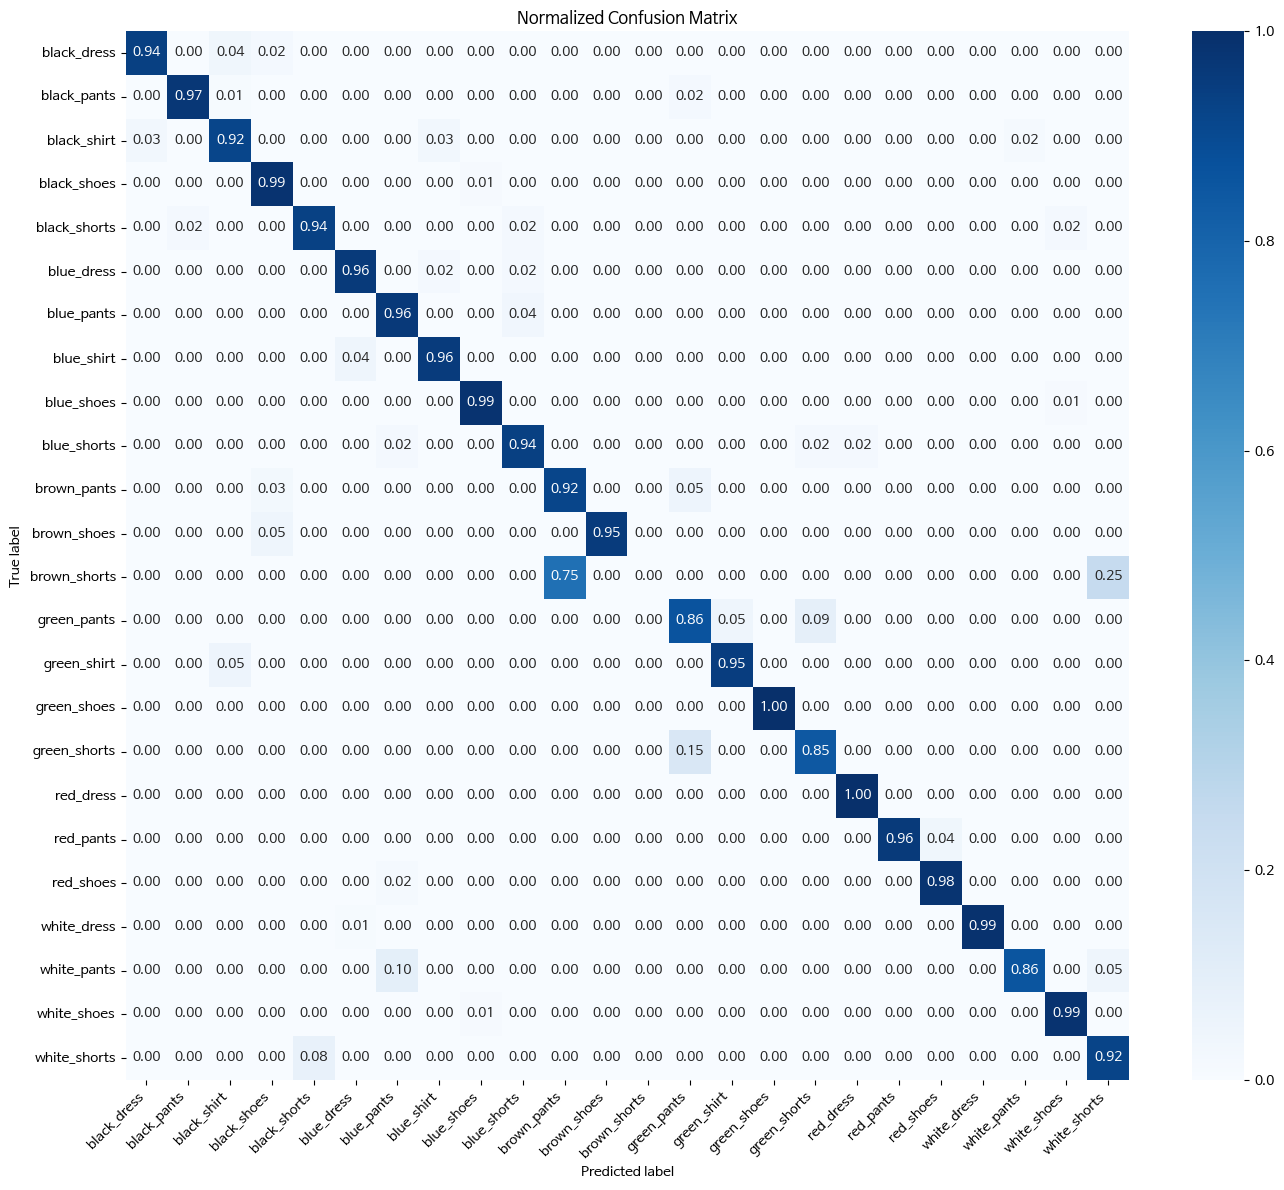

In [ ]:
import torch
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# --------------------------
# 1. 모델 테스트셋 평가
# --------------------------
model.eval()
test_loss = 0.0
test_correct = 0
total = 0

all_labels = []
all_preds = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)
        test_loss += loss.item() * images.size(0)

        _, predicted = torch.max(outputs, 1)
        test_correct += (predicted == labels).sum().item()
        total += labels.size(0)

        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(predicted.cpu().numpy())

test_loss /= total
test_accuracy = test_correct / total

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

# --------------------------
# 2. Classification Report
# --------------------------
print("Classification Report")
print(classification_report(all_labels, all_preds, target_names=class_names))

# --------------------------
# 3. Confusion Matrix 시각화
# --------------------------
cm = confusion_matrix(all_labels, all_preds)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # 행별 정규화

plt.figure(figsize=(14, 12))
sns.heatmap(cm_normalized,
            annot=True,
            fmt=".2f",
            cmap="Blues",
            xticklabels=class_names,
            yticklabels=class_names)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Normalized Confusion Matrix')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

**6. 추론 및 모델 저장**

<aside>

**진행 프로세스**

학습이 끝난 모델은 재사용할 수 있도록 파일 형태로 저장해야 합니다. 저장된 모델은 이후 불러와서 새로운 이미지에 대해 **추론(inference)**을 수행할 수 있습니다.

추론 과정에서는 모델이 학습한 특징을 바탕으로 이미지를 해석하고, 입력 데이터에 대한 예측 결과를 산출합니다. 따라서 구축한 모델이 해당 이미지의 특성을 파악하여 분류를 수행할수 있는 추론용 데이터는 별도로 준비하여 작업합니다.

</aside>

모델이 model_best.pth로 저장되었습니다.
저장된 모델이 성공적으로 로드되었습니다.


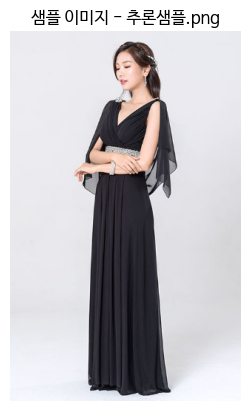

예측 클래스: black_dress


In [ ]:
from torch.utils.data import DataLoader
from torchvision import models, transforms
from PIL import Image
import torch

# --------------------------------------
# 1. 모델 저장 (학습 완료 후)
# --------------------------------------
# model : 학습 완료된 모델
# PATH : 저장할 경로
PATH = 'model_best.pth'
torch.save(model.state_dict(), PATH)
print(f"모델이 {PATH}로 저장되었습니다.")

# --------------------------------------
# 2. 모델 로드
# --------------------------------------
# 모델 구조는 학습 때와 동일하게 정의해야 함
# from torchvision import models

num_classes = 24  # 클래스 수 (학습 때와 동일하게 24로 설정)
loaded_model = models.resnet50(pretrained=False)  # ResNet18 대신 ResNet50 로드
loaded_model.fc = torch.nn.Linear(loaded_model.fc.in_features, num_classes)
loaded_model.load_state_dict(torch.load(PATH, map_location='cpu'))
loaded_model.eval()  # 평가 모드

print("저장된 모델이 성공적으로 로드되었습니다.")

# --------------------------------------
# 3. 추론(Inference)
# --------------------------------------
# 학습 시 사용했던 transform과 동일하게 맞추기
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# 단일 이미지 추론
img_path = '/content/drive/MyDrive/fashion/추론샘플.png'  # 추론할 이미지 경로 (이전 셀에서 사용한 경로와 일치)
image = Image.open(img_path).convert('RGB')
input_tensor = transform(image).unsqueeze(0)  # 배치 차원 추가
plt.imshow(img)
plt.title("샘플 이미지 - 추론샘플.png")
plt.axis('off')
plt.show()
# GPU 사용 가능 시 이동
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
loaded_model = loaded_model.to(device)
input_tensor = input_tensor.to(device)


with torch.no_grad():
    outputs = loaded_model(input_tensor)
    _, predicted = torch.max(outputs, 1)
    # print(f"예측 클래스 인덱스: {predicted.item()}") # 클래스 이름으로 출력하도록 수정
    print(f"예측 클래스: {class_names[predicted.item()]}") # class_names 변수는 이전 셀에서 정의됨
